In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data\Weather\weatherHistory.csv")
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Year'] = data['Formatted Date'].dt.year
data['Day_Year'] = data['Formatted Date'].dt.dayofyear
data = data.groupby(['Day_Year', 'Year'])['Temperature (C)'].mean().reset_index()
data.head()

,Day_Year,Year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407


In [3]:
X = data['Day_Year'].values
Y= data['Temperature (C)'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)

# model

In [11]:
model = tf.keras.models.Sequential([
    Dense(512, input_dim=1, activation='relu'),
    Dense(128, activation='relu'),# tanh relu sigmoid
    Dense(64, activation='relu'),
    Dense(1, activation='linear') # OL sigmoid linear  softmax
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss = tf.keras.losses.MeanSquaredError()
              )

In [13]:

model.fit(X_train, Y_train, epochs=800)

Epoch 1/800
95/95 [==============================] - 2s 4ms/step - loss: 108.4621
Epoch 2/800
95/95 [==============================] - 0s 4ms/step - loss: 98.4913
Epoch 3/800
95/95 [==============================] - 0s 4ms/step - loss: 95.7714
Epoch 4/800
95/95 [==============================] - 0s 4ms/step - loss: 91.8883
Epoch 5/800
95/95 [==============================] - 0s 4ms/step - loss: 91.8875
Epoch 6/800
95/95 [==============================] - 0s 4ms/step - loss: 88.5269
Epoch 7/800
95/95 [==============================] - 0s 4ms/step - loss: 88.0386
Epoch 8/800
95/95 [==============================] - 0s 4ms/step - loss: 80.5505
Epoch 9/800
95/95 [==============================] - 0s 4ms/step - loss: 76.3778
Epoch 10/800
95/95 [==============================] - 0s 4ms/step - loss: 58.5169
Epoch 11/800
95/95 [==============================] - 1s 6ms/step - loss: 41.0734
Epoch 12/800
95/95 [==============================] - 0s 5ms/step - loss: 36.6377
Epoch 13/800
95/95 [====

95/95 [==============================] - 1s 2ms/step


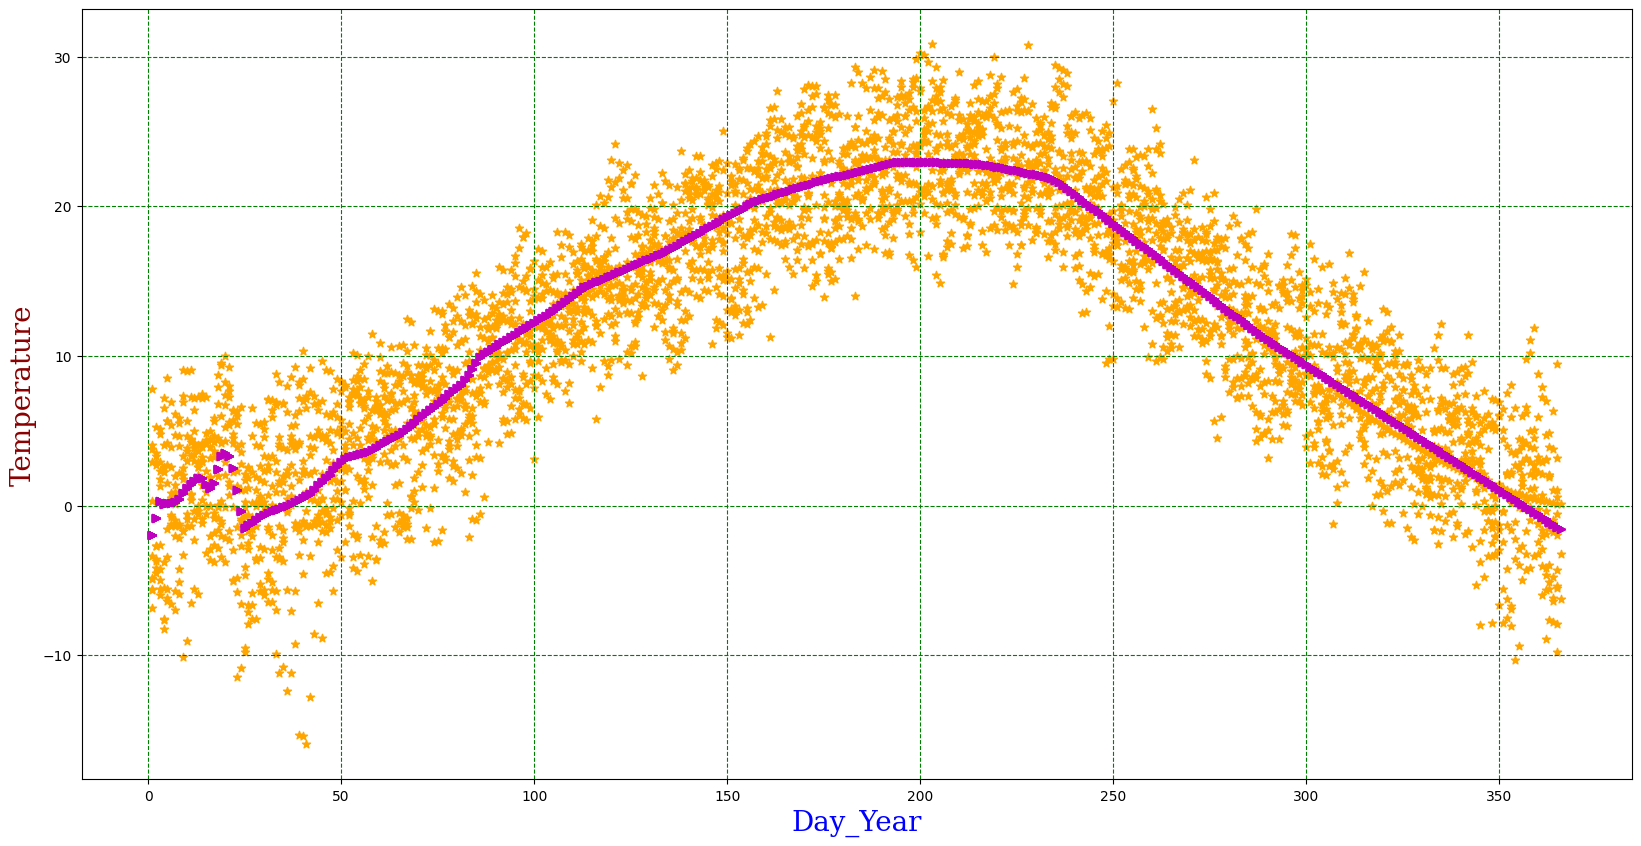

In [14]:
plt.figure(figsize=(20, 10))
Y_pred = model.predict(X_train)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':20}
plt.scatter(X, Y, marker='*', c='orange')
plt.plot(X_train, Y_pred, ">",  color='m', lw=4, label='Fitted line')
plt.xlabel('Day_Year', fontdict = font1)
plt.ylabel('Temperature', fontdict = font2)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.8)

In [ ]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 5ms/step - loss: 34.4568


34.456756591796875